**Локальное тематическое моделирование (по каждой книге отдельно)**

In [1]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle

import gensim
import gensim.corpora as corpora
from gensim.models import LdaModel
from gensim.models import CoherenceModel

from sklearn.metrics.pairwise import cosine_similarity

In [2]:
with open('processed_data.pkl', 'rb') as f:
    base_data = pickle.load(f)

processed_segments = base_data['processed_segments']
segments = base_data['segments']
book1_end = base_data['b1_end']
book2_end = base_data['b2_end']
chapter_start_indices = base_data['chapter_to_chunk_indices'] 

with open('global_model_results.pkl', 'rb') as f:
    global_results = pickle.load(f)

topic_matrix = global_results['topic_matrix']
global_topic_names = global_results['topic_names'] 

full_lda_model = LdaModel.load('full_lda_model.model')

Теперь подбираем количество тем для каждой книги отдельно

In [3]:
print("Хранители: Подбор количества тем")

# Подготовка данных
processed_book1 = processed_segments[:book1_end]
id2word_book1 = corpora.Dictionary(processed_book1)
print(f"Исходный словарь: {len(id2word_book1)} слов")

id2word_book1.filter_extremes(no_below=3, no_above=0.6)
print(f"После фильтрации: {len(id2word_book1)} слов")

corpus_book1 = [id2word_book1.doc2bow(seg) for seg in processed_book1]
print(f"Корпус: {len(corpus_book1)} документов")

# Подбор количества тем
print("\nПодбор количества тем:")
coherence_scores_book1 = []
topic_range = range(4, 12)

for num_topics in topic_range:
    temp_model = gensim.models.LdaModel(
        corpus=corpus_book1,
        id2word=id2word_book1,
        num_topics=num_topics,
        passes=100,
        random_state=42
    )
    
    coherence = CoherenceModel(
        model=temp_model,
        texts=processed_book1,
        dictionary=id2word_book1,
        coherence='c_v'
    ).get_coherence()
    
    coherence_scores_book1.append(coherence)
    print(f"  Тем: {num_topics}, Когерентность: {coherence:.4f}")

best_num_book1 = topic_range[coherence_scores_book1.index(max(coherence_scores_book1))]
best_coherence_book1 = max(coherence_scores_book1)

print(f"\n Оптимально: {best_num_book1} тем (coherence = {best_coherence_book1:.4f})")

Хранители: Подбор количества тем
Исходный словарь: 3548 слов
После фильтрации: 1626 слов
Корпус: 180 документов

Подбор количества тем:
  Тем: 4, Когерентность: 0.4592
  Тем: 5, Когерентность: 0.3980
  Тем: 6, Когерентность: 0.4349
  Тем: 7, Когерентность: 0.4839
  Тем: 8, Когерентность: 0.4595
  Тем: 9, Когерентность: 0.4742
  Тем: 10, Когерентность: 0.4571
  Тем: 11, Когерентность: 0.4661

 Оптимально: 7 тем (coherence = 0.4839)


In [4]:
print("ДВЕ ТВЕРДЫНИ: Подбор количества тем")

processed_book2 = processed_segments[book1_end:book2_end]
id2word_book2 = corpora.Dictionary(processed_book2)
print(f"Исходный словарь: {len(id2word_book2)} слов")

id2word_book2.filter_extremes(no_below=3, no_above=0.7)
print(f"После фильтрации: {len(id2word_book2)} слов")

corpus_book2 = [id2word_book2.doc2bow(seg) for seg in processed_book2]
print(f"Корпус: {len(corpus_book2)} документов")

print("\nПодбор количества тем:")
coherence_scores_book2 = []

for num_topics in topic_range:
    temp_model = gensim.models.LdaModel(
        corpus=corpus_book2,
        id2word=id2word_book2,
        num_topics=num_topics,
        passes=100,
        random_state=42
    )
    
    coherence = CoherenceModel(
        model=temp_model,
        texts=processed_book2,
        dictionary=id2word_book2,
        coherence='c_v'
    ).get_coherence()
    
    coherence_scores_book2.append(coherence)
    print(f"  Тем: {num_topics}, Когерентность: {coherence:.4f}")

best_num_book2 = topic_range[coherence_scores_book2.index(max(coherence_scores_book2))]
best_coherence_book2 = max(coherence_scores_book2)

print(f"\nОптимально: {best_num_book2} тем (coherence = {best_coherence_book2:.4f})")

ДВЕ ТВЕРДЫНИ: Подбор количества тем
Исходный словарь: 3548 слов
После фильтрации: 1627 слов
Корпус: 160 документов

Подбор количества тем:
  Тем: 4, Когерентность: 0.4697
  Тем: 5, Когерентность: 0.4453
  Тем: 6, Когерентность: 0.4840
  Тем: 7, Когерентность: 0.4557
  Тем: 8, Когерентность: 0.4706
  Тем: 9, Когерентность: 0.4761
  Тем: 10, Когерентность: 0.4752
  Тем: 11, Когерентность: 0.4569

Оптимально: 6 тем (coherence = 0.4840)


In [5]:
print("ВОЗВРАЩЕНИЕ ГОСУДАРЯ: Подбор количества тем")

processed_book3 = processed_segments[book2_end:]
id2word_book3 = corpora.Dictionary(processed_book3)
print(f"Исходный словарь: {len(id2word_book3)} слов")

id2word_book3.filter_extremes(no_below=2, no_above=0.7)
print(f"После фильтрации: {len(id2word_book3)} слов")

corpus_book3 = [id2word_book3.doc2bow(seg) for seg in processed_book3]
print(f"Корпус: {len(corpus_book3)} документов")

print("\nПроверка количества тем:")
coherence_scores_book3 = []

for num_topics in topic_range:
    temp_model = gensim.models.LdaModel(
        corpus=corpus_book3,
        id2word=id2word_book3,
        num_topics=num_topics,
        passes=100,
        random_state=42
    )
    
    coherence = CoherenceModel(
        model=temp_model,
        texts=processed_book3,
        dictionary=id2word_book3,
        coherence='c_v'
    ).get_coherence()
    
    coherence_scores_book3.append(coherence)
    print(f"  Тем: {num_topics}, Когерентность: {coherence:.4f}")

best_num_book3 = topic_range[coherence_scores_book3.index(max(coherence_scores_book3))]
best_coherence_book3 = max(coherence_scores_book3)

print(f"\nОптимально: {best_num_book3} тем (coherence = {best_coherence_book3:.4f})")

ВОЗВРАЩЕНИЕ ГОСУДАРЯ: Подбор количества тем
Исходный словарь: 3563 слов
После фильтрации: 2412 слов
Корпус: 155 документов

Проверка количества тем:
  Тем: 4, Когерентность: 0.4441
  Тем: 5, Когерентность: 0.4768
  Тем: 6, Когерентность: 0.4863
  Тем: 7, Когерентность: 0.4941
  Тем: 8, Когерентность: 0.4907
  Тем: 9, Когерентность: 0.4694
  Тем: 10, Когерентность: 0.4619
  Тем: 11, Когерентность: 0.4333

Оптимально: 7 тем (coherence = 0.4941)


In [6]:
books_data = [
    ('Хранители', processed_book1, corpus_book1, id2word_book1, best_num_book1, best_coherence_book1),
    ('Две твердыни', processed_book2, corpus_book2, id2word_book2, best_num_book2, best_coherence_book2),
    ('Возвращение государя', processed_book3, corpus_book3, id2word_book3, best_num_book3, best_coherence_book3)
]

# Обучаем все модели
lda_models = {}

for book_name, processed, corpus, dictionary, num_topics, coherence in books_data:
    print(f"\nОбучение LDA для '{book_name}' ({num_topics} тем)")
    
    # Обучаем модель
    lda = gensim.models.LdaModel(
        corpus=corpus,
        id2word=dictionary,
        num_topics=num_topics,
        passes=100,
        random_state=42
    )
    
    # Сохраняем
    lda_models[book_name] = {
        'model': lda,
        'num_topics': num_topics,
        'coherence': coherence
    }
    
    # Выводим темы
    print(f"\nТемы книги '{book_name}':")
    for idx, topic in lda.print_topics(num_topics=num_topics, num_words=20):
        words = [word.split('*')[1].strip('"') for word in topic.split('+')][:20]
        print(f"  Тема {idx+1}: {', '.join(words)}")


Обучение LDA для 'Хранители' (7 тем)

Темы книги 'Хранители':
  Тема 1: кольцо" , элронд" , враг" , эльф" , бильбо" , сила" , мордор" , саруман" , саурон" , совет" , раздол" , всевластие" , гном" , гондор" , арагорн" , боромир" , исилдур" , меч" , человек" , год
  Тема 2: бильбо" , год" , кольцо" , торба" , хоббитания" , мерри" , торбинс" , пора" , лякошель" , пин" , маг" , рождение" , брендизайк" , угощение" , норгорд" , гном" , карман" , подарок" , крол" , торбинсы
  Тема 3: эльф" , хранитель" , лориэн" , владычица" , леголас" , хэлдар" , горлум" , гимли" , гном" , галадриэль" , арагорн" , андуин" , владыка" , враг" , тьма" , орк" , звезда" , край" , берег" , боромир
  Тема 4: арагорн" , мерри" , всадник" , письмо" , зеркало" , пин" , гаральд" , хоббитания" , пони" , враг" , огонь" , хозяин" , сон" , ноб" , вопрос" , пригорье" , волшебство" , золотинка" , наркисс" , лавр
  Тема 5: всадник" , конь" , хоббитания" , пин" , пони" , бирюк" , трактир" , пригорье" , ворота" , арагорн" , хо

In [7]:
# Создаем список с моделями и метаданными для каждой из трех книг
topic_names_book1 = {
    0: "Совет в Ривенделле и история Кольца", 
    1: "Хоббитон: Праздник и наследство Бильбо",
    2: "Лотлориэн: Владычица и дары эльфов",
    3: "Бри: Следопыт и 'Гарцующий Пони'",
    4: "Дорога в Пригорье и Переправа",
    5: "Мория: Путь во тьме и гибель Мага",
    6: "Странствия по Дикому Краю"
}

topic_names_book2 = {
    0: "Мертвые болота: Фродо и прелесть Горлума",
    1: "Рохан: Король Теоден и Гнилоуст",
    2: "Итилия: Фарамир и память о Боромире",
    3: "Изенгард: Палантир и железная башня",
    4: "Фангорн: Древень и Гнев Энтов",
    5: "Плен: Урук-хаи и погоня по степи"
}

topic_names_book3 = {
    0: "Осада Минас-Тирита: Наместник и воины",
    1: "Стезя Мертвецов и Рохиррим",
    2: "Кирит Унгол и Роковая Гора",
    3: "Финал Эпохи: Корабли в Гавани",
    4: "Палаты Исцеления: Врачевание и мир",
    5: "Очищение Шира: Возвращение домой",
    6: "Совет Вождей и путь к Мордору"
}

# Группируем названия книг, корпуса и границы чанков
books_with_names = [
    ('Хранители', lda_models['Хранители'], corpus_book1, 0, book1_end, topic_names_book1),
    ('Две твердыни', lda_models['Две твердыни'], corpus_book2, book1_end, book2_end, topic_names_book2),
    ('Возвращение государя', lda_models['Возвращение государя'], corpus_book3, book2_end, len(processed_segments), topic_names_book3)
]

# Проходим циклом по каждой книге
for book_name, lda_data, corpus_book, start_idx, end_idx, topic_names in books_with_names:
    print(f"\n{book_name.upper()}\n")  
    lda = lda_data['model']
    # Срез предобработанных сегментов, относящихся к текущей книге
    current_book_chunks = processed_segments[start_idx:end_idx]

    # находим доминирующую тему
    doc_topics = []
    for i, doc in enumerate(corpus_book):
        topic_dist = lda.get_document_topics(doc)
        if topic_dist:
            # Выбираем тему с максимальной вероятностью
            dominant = max(topic_dist, key=lambda x: x[1])
            doc_topics.append((i, dominant[0], dominant[1]))
    
    # Выводим отчет по каждой локальной теме
    for topic_id in range(lda.num_topics):
        t_name = topic_names.get(topic_id, f"Тема {topic_id}")
        print(f"ТЕМА {topic_id}: {t_name}")

        # Показываем лексическое ядро темы (топ-10 слов)
        words = [w[0] for w in lda.show_topic(topic_id, topn=10)]
        print(f"Ключевые слова: {', '.join(words)}")

        # Находим и выводим самые репрезентативные примеры
        examples = sorted([d for d in doc_topics if d[1] == topic_id], 
                         key=lambda x: x[2], reverse=True)[:2]
        
        count_seg = len([d for d in doc_topics if d[1] == topic_id])
        print(f"Всего чанков в теме: {count_seg}")
        
        # Печатаем начало текста сегмента
        for idx, (seg_id, _, prob) in enumerate(examples, 1):
            if seg_id < len(current_book_chunks):
                chunk_text = " ".join(current_book_chunks[seg_id])
                print(f"   {idx}. Чанк #{seg_id} (Вероятность: {prob:.1%}):")
                print(f"      Текст: {chunk_text[:200]}...")
            else:
                print(f"   {idx}. Чанк #{seg_id}: [Текст недоступен]")
    print("\n")


ХРАНИТЕЛИ

ТЕМА 0: Совет в Ривенделле и история Кольца
Ключевые слова: кольцо, элронд, враг, эльф, бильбо, сила, мордор, саруман, саурон, совет
Всего чанков в теме: 38
   1. Чанк #94 (Вероятность: 99.5%):
      Текст: выход битва враг жизнь битва враг кольцо кольцо элронд раздол встреча смута кольцо судьба кольцо пора кольцо элронд элронд эпоха кольцо властелин мордор саурон часть дыхание эльф кузнец остранна дружб...
   2. Чанк #93 (Вероятность: 99.5%):
      Текст: тяга перемена гном одинокая_гора худо пристанище разговор царство язык гном казад дума труд отец владение мория глоин мечта гном край предок богатство слава недра камень металл поверхность земля бездн...
ТЕМА 1: Хоббитон: Праздник и наследство Бильбо
Ключевые слова: бильбо, год, кольцо, торба, хоббитания, мерри, торбинс, пора, лякошель, пин
Всего чанков в теме: 16
   1. Чанк #2 (Вероятность: 99.4%):
      Текст: сэм праздник потеха потеха хоббитания год пора крол норгорд фургон ящик торба хоббит темень лошадь гном капюшон

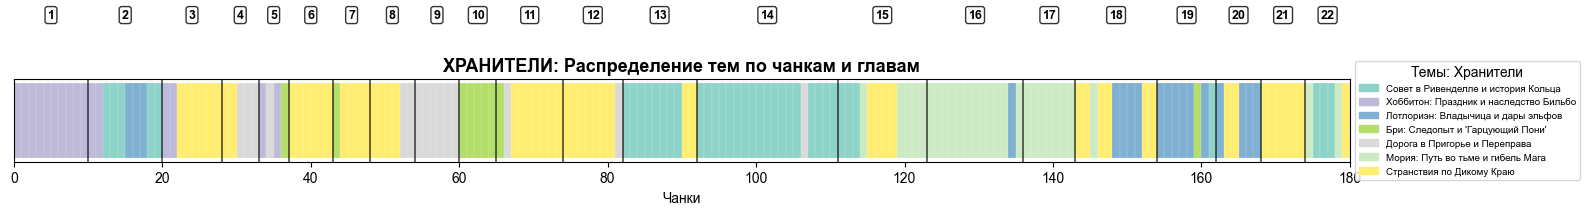

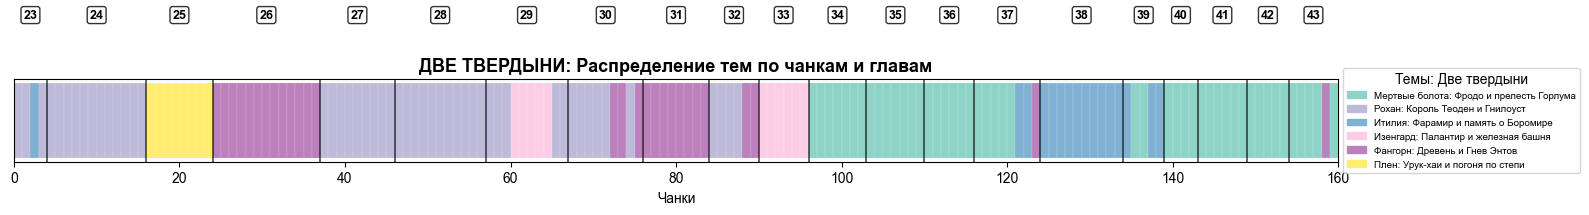

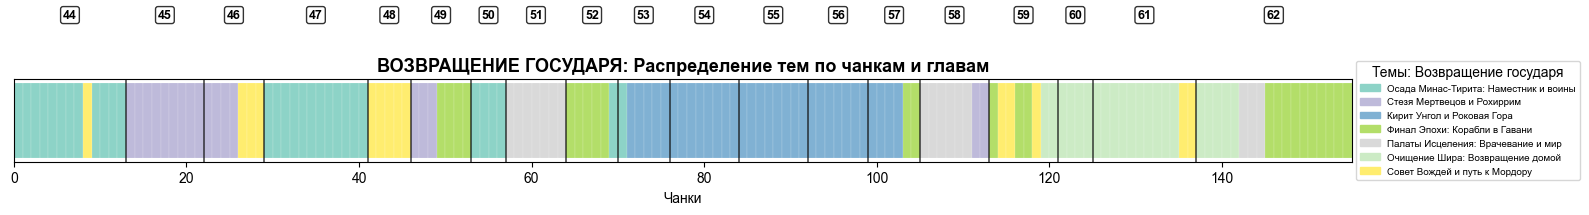

In [8]:
# Опять рисуем графики распределения тем, но уже для локальных
topic_names_book1 = {
    0: "Совет в Ривенделле и история Кольца", 
    1: "Хоббитон: Праздник и наследство Бильбо",
    2: "Лотлориэн: Владычица и дары эльфов",
    3: "Бри: Следопыт и 'Гарцующий Пони'",
    4: "Дорога в Пригорье и Переправа",
    5: "Мория: Путь во тьме и гибель Мага",
    6: "Странствия по Дикому Краю"
}

topic_names_book2 = {
    0: "Мертвые болота: Фродо и прелесть Горлума",
    1: "Рохан: Король Теоден и Гнилоуст",
    2: "Итилия: Фарамир и память о Боромире",
    3: "Изенгард: Палантир и железная башня",
    4: "Фангорн: Древень и Гнев Энтов",
    5: "Плен: Урук-хаи и погоня по степи"
}

topic_names_book3 = {
    0: "Осада Минас-Тирита: Наместник и воины",
    1: "Стезя Мертвецов и Рохиррим",
    2: "Кирит Унгол и Роковая Гора",
    3: "Финал Эпохи: Корабли в Гавани",
    4: "Палаты Исцеления: Врачевание и мир",
    5: "Очищение Шира: Возвращение домой",
    6: "Совет Вождей и путь к Мордору"
} 

# Группируем названия тем по книгам
topic_names_by_book = {
    'Хранители': topic_names_book1,
    'Две твердыни': topic_names_book2,
    'Возвращение государя': topic_names_book3
}

books_viz = [
    ('Хранители', lda_models['Хранители'], corpus_book1, 0, book1_end),
    ('Две твердыни', lda_models['Две твердыни'], corpus_book2, book1_end, book2_end),
    ('Возвращение государя', lda_models['Возвращение государя'], corpus_book3, book2_end, len(processed_segments))
]

for book_name, lda_data, corpus_book, start_global, end_global in books_viz:
    lda = lda_data['model']
    num_topics_book = lda.num_topics

    # Определяем доминирующую тему для каждого чанка текста
    doc_topics = []
    for doc in corpus_book:
        topic_dist = lda.get_document_topics(doc)
        if topic_dist:
            dominant = max(topic_dist, key=lambda x: x[1])[0]
        else:
            dominant = 0
        doc_topics.append(dominant)

    # Подготавливаем список имен тем для легенды
    topic_names_list = [topic_names_by_book[book_name][i] for i in range(num_topics_book)]

    # Создаем график
    plt.rcParams['font.family'] = 'sans-serif'
    plt.rcParams['font.sans-serif'] = ['Helvetica', 'Arial', 'DejaVu Sans']
    plt.figure(figsize=(16, 4))
    colors = plt.cm.Set3(np.linspace(0, 1, num_topics_book))
    
    # Рисуем чанки: каждый бар — это один чанк текста
    for i in range(len(doc_topics)):
        plt.barh(0, 1, left=i, height=0.5,
                color=colors[doc_topics[i]], edgecolor='white', linewidth=0.1)
    
    handles = [plt.Rectangle((0, 0), 1, 1, color=colors[i]) for i in range(num_topics_book)]
    plt.legend(handles, topic_names_list,
              loc='center left', bbox_to_anchor=(1, 0.5),
              title=f"Темы: {book_name}", fontsize=7)
    
    # Отбираем индексы начала глав, попадающие в диапазон текущей книги
    current_book_chapters = [
        (pos, i + 1) for i, pos in enumerate(chapter_start_indices)
        if start_global <= pos < end_global
    ]
    
    # Рисуем разделительные линии между главами
    for pos, _ in current_book_chapters:
        plt.axvline(x=pos - start_global, color='black', linestyle='-', linewidth=1.2, alpha=0.7)
    
    # Подписываем номера глав
    for i in range(len(current_book_chapters)):
        pos_start, ch_num = current_book_chapters[i]
        local_start = pos_start - start_global
        
        # Определяем конец главы для центрирования текста
        if i < len(current_book_chapters) - 1:
            local_end = current_book_chapters[i+1][0] - start_global
        else:
            local_end = len(doc_topics)
            
        mid = (local_start + local_end) / 2
        
        plt.text(mid, 0.7, str(ch_num),
                ha='center', va='center', fontsize=9, fontweight='bold',
                bbox=dict(boxstyle="round,pad=0.2", facecolor='white', alpha=0.8))
    
    plt.title(f'{book_name.upper()}: Распределение тем по чанкам и главам', fontweight='bold', fontsize=13)
    plt.xlabel('Чанки', fontsize=10)
    plt.yticks([])
    plt.xlim(0, len(doc_topics))
    plt.tight_layout()
    plt.show()

In [9]:
# Посмотрим сопоставление локальных и глобальных тем
topic_names = [
    "Лотлориэн: Приют эльфов", 
    "Фангорн и Гнев Энтов",
    "Минас Тирит: Наместник и воины",
    "Сражения и Назгулы",
    "Легенды о народе Дарина",
    "Мория: Путь во тьме",
    "Праздник в Шире",
    "География: Дикие земли",
    "Преследование Смеагола",
    "Бри: У Наркисса",
    "Раздол: Зеркало и Совет",
    "Совет: История Кольца",
    "Коронация и Тронный зал",
    "Рохан: Всадники и Конунг",
    "Братство на Андуине",
    "Палаты Исцеления",
    "Крепость Кирит Унгол"
]

# Глобальные темы
global_topics = []
for topic_id in range(17):
    words = dict(full_lda_model.show_topic(topic_id, topn=100))
    global_topics.append(words)

# Локальные темы для первой книги
local_topics_book1 = []
for topic_id in range(7):
    words = dict(lda_models['Хранители']['model'].show_topic(topic_id, topn=100))
    local_topics_book1.append(words)

# Локальные темы для второй книги
local_topics_book2 = []
for topic_id in range(6):
    words = dict(lda_models['Две твердыни']['model'].show_topic(topic_id, topn=100))
    local_topics_book2.append(words)

# Локальные темы для третьей книги
local_topics_book3 = []
for topic_id in range(7):
    words = dict(lda_models['Возвращение государя']['model'].show_topic(topic_id, topn=100))
    local_topics_book3.append(words)

def compare_topics(global_topic_dict, local_topic_dict):
    """Считаем косинусное сходство между темами"""
    all_words = set(global_topic_dict.keys()) | set(local_topic_dict.keys())

    # Превращаем слова в числовые векторы на основе их весов в теме
    vec1 = np.array([global_topic_dict.get(w, 0) for w in all_words])
    vec2 = np.array([local_topic_dict.get(w, 0) for w in all_words])

    # Защита от деления на ноль
    if np.linalg.norm(vec1) == 0 or np.linalg.norm(vec2) == 0:
        return 0
    
    # Формула косинусного сходства
    return np.dot(vec1, vec2) / (np.linalg.norm(vec1) * np.linalg.norm(vec2))

print("ХРАНИТЕЛИ: Как глобальные темы раскладываются на локальные")
for local_id, local_topic in enumerate(local_topics_book1):
    similarities = []
    # Сравниваем каждую локальную тему со всеми 17 глобальными
    for global_id, global_topic in enumerate(global_topics):
        sim = compare_topics(global_topic, local_topic)
        similarities.append((global_id, sim))
    
    # Сортируем по убыванию сходства и берем Топ-2
    similarities.sort(key=lambda x: x[1], reverse=True)
    
    print(f"\n Локальная тема {local_id}: {topic_names_book1[local_id]}")
    print(f"   Связана с глобальными темами:")
    for g_id, sim in similarities[:2]:
        if sim > 0.3:  # Порог отсекает слабые связи
            print(f"     Тема {g_id} ({sim:.2f}): {topic_names[g_id]}")

print("\nДВЕ ТВЕРДЫНИ: Как глобальные темы раскладываются на локальные")
for local_id, local_topic in enumerate(local_topics_book2):
    similarities = []
    for global_id, global_topic in enumerate(global_topics):
        sim = compare_topics(global_topic, local_topic)
        similarities.append((global_id, sim))
    
    similarities.sort(key=lambda x: x[1], reverse=True)
    
    print(f"\n Локальная тема {local_id}: {topic_names_book2[local_id]}")
    print(f"   Связана с глобальными темами:")
    for g_id, sim in similarities[:2]:
        if sim > 0.3:
            print(f"     Тема {g_id} ({sim:.2f}): {topic_names[g_id]}")

print("\nВОЗВРАЩЕНИЕ ГОСУДАРЯ: Как глобальные темы раскладываются на локальные")
for local_id, local_topic in enumerate(local_topics_book3):
    similarities = []
    for global_id, global_topic in enumerate(global_topics):
        sim = compare_topics(global_topic, local_topic)
        similarities.append((global_id, sim))
    
    similarities.sort(key=lambda x: x[1], reverse=True)
    
    print(f"\n Локальная тема {local_id}: {topic_names_book3[local_id]}")
    print(f"   Связана с глобальными темами:")
    for g_id, sim in similarities[:2]:
        if sim > 0.3:
            print(f"     Тема {g_id} ({sim:.2f}): {topic_names[g_id]}")

ХРАНИТЕЛИ: Как глобальные темы раскладываются на локальные

 Локальная тема 0: Совет в Ривенделле и история Кольца
   Связана с глобальными темами:
     Тема 9 (0.41): Бри: У Наркисса
     Тема 10 (0.33): Раздол: Зеркало и Совет

 Локальная тема 1: Хоббитон: Праздник и наследство Бильбо
   Связана с глобальными темами:
     Тема 2 (0.83): Минас Тирит: Наместник и воины

 Локальная тема 2: Лотлориэн: Владычица и дары эльфов
   Связана с глобальными темами:
     Тема 13 (0.49): Рохан: Всадники и Конунг
     Тема 4 (0.39): Легенды о народе Дарина

 Локальная тема 3: Бри: Следопыт и 'Гарцующий Пони'
   Связана с глобальными темами:

 Локальная тема 4: Дорога в Пригорье и Переправа
   Связана с глобальными темами:
     Тема 8 (0.30): Преследование Смеагола

 Локальная тема 5: Мория: Путь во тьме и гибель Мага
   Связана с глобальными темами:
     Тема 1 (0.65): Фангорн и Гнев Энтов
     Тема 3 (0.58): Сражения и Назгулы

 Локальная тема 6: Странствия по Дикому Краю
   Связана с глобальными 

In [10]:
# Создаем функцию, которая превращает результаты LDA в матрицу чисел
def get_local_matrix(lda_model, corpus):
    num_topics = lda_model.num_topics
    # Создаем пустую таблицу: строк столько, сколько сегментов, столбцов - сколько тем
    matrix = np.zeros((len(corpus), num_topics))
    
    for i, doc in enumerate(corpus):
        # Получаем веса тем для конкретного сегмента
        topic_dist = lda_model.get_document_topics(doc, minimum_probability=0)
        for topic_id, prob in topic_dist:
            matrix[i, topic_id] = prob
    return matrix

for book_name, data in lda_models.items():
    model = data['model']
    model.save(f'lda_{book_name}.model')

local_analysis_results = {
    # Получаем веса локальных тем
    'book1_local_matrix': get_local_matrix(lda_models['Хранители']['model'], corpus_book1),
    'book2_local_matrix': get_local_matrix(lda_models['Две твердыни']['model'], corpus_book2),
    'book3_local_matrix': get_local_matrix(lda_models['Возвращение государя']['model'], corpus_book3),
    
    'book1_topic_names': topic_names_book1,
    'book2_topic_names': topic_names_book2,
    'book3_topic_names': topic_names_book3,

    'corpus_book1': corpus_book1,
    'corpus_book2': corpus_book2,
    'corpus_book3': corpus_book3
}

with open('local_analysis_results.pkl', 'wb') as f:
    pickle.dump(local_analysis_results, f)